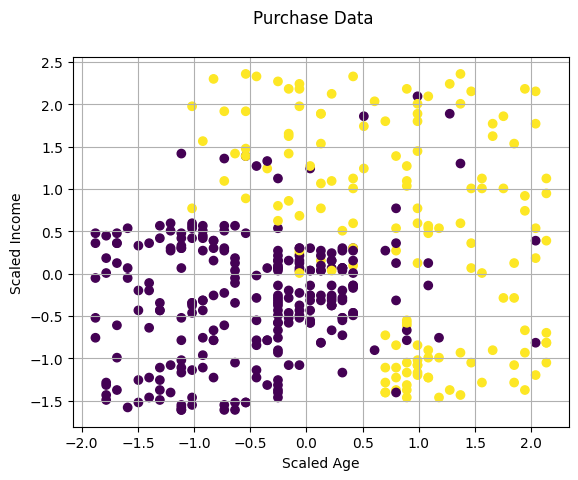

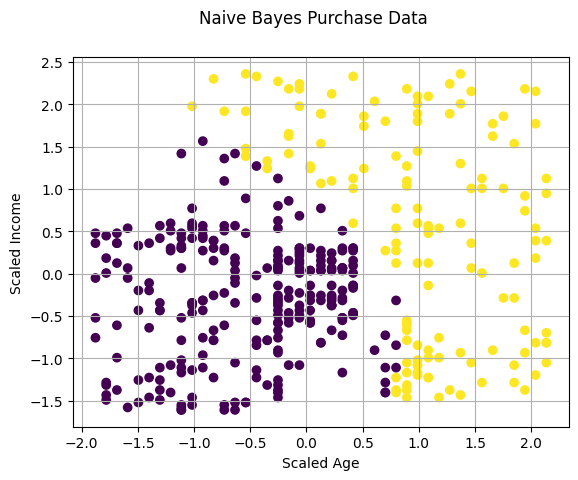

Confusion matrix of Naive Bayes is 
 [[55  3]
 [ 4 18]] 

Accuracy score of Naive Bayes is 91.25 %



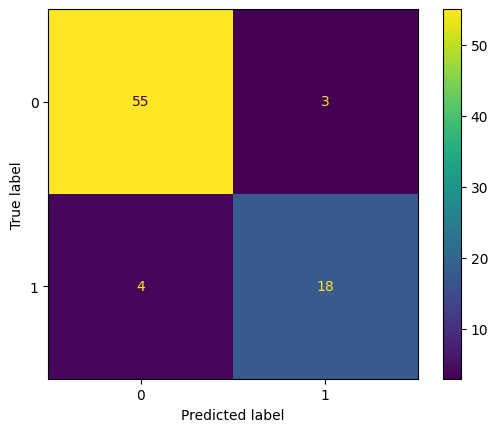

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

purchaseData = pd.read_csv('Purchase_Logistic.csv')

#Naive Bayes-Social-Network-Ads

#Dataset
#The dataset contains 400 entries for each of the features
#userId
#gender
#age
#estimatedsalary

#The target is
#purchased history
#The features taken into account are age and estimated salary which are
#required to predict if the user will purchase a new car (1=Yes, 0=No)

X = purchaseData.iloc[:, [2, 3]]
Y = purchaseData.iloc[:, 4]

scaler=StandardScaler()
X=scaler.fit_transform(X)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

cf = GaussianNB()
cf.fit(Xtrain, Ytrain)

Ypred = cf.predict(Xtest)

plt.figure(1);
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.suptitle('Purchase Data')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Income')
plt.grid(1,which='both')
plt.axis('tight')
plt.show()

col = cf.predict(X)

plt.figure(2);
plt.scatter(X[:, 0], X[:, 1], c = col)
plt.suptitle('Naive Bayes Purchase Data')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Income')
plt.grid(1,which='both')
plt.axis('tight')
plt.show()

cmat = confusion_matrix(Ytest, Ypred)
print('Confusion matrix of Naive Bayes is \n',cmat,'\n')

disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()

LRscore = accuracy_score(Ypred,Ytest)
print('Accuracy score of Naive Bayes is',100*LRscore,'%\n')